In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv("data/appstore_games.csv")

In [4]:
data.head(2)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018


In [5]:
data.shape

(17007, 18)

In [7]:
data.tail(2)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019
17006,https://apps.apple.com/us/app/the-three-kingdo...,1475076711,The Three Kingdoms :Bomb,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,NaN,The protagonist uses the method of placing a b...,ming bo tang,4+,"EN, ZH",22952960.0,Games,"Games, Strategy, Puzzle",2/08/2019,2/08/2019


# EDA & Preprocessing

In [276]:
to_drop = [
    'URL', 'ID', 'Icon URL', 
    'Name', 'Subtitle', 'In-app Purchases',
    'Description', 'Languages',
    'Primary Genre', 'Current Version Release Date', 
    'Original Release Date', 'Genres', 'Developer'
]

## Duplicates

In [17]:
data = data[~data.duplicated()]

In [19]:
data.shape

(16847, 18)

## Name

In [18]:
data['Name'].value_counts()

Pocket Star Saga                                               1
Edge Of Sanity                                                 1
Backgammon - The Board Game                                    1
Modern Counter Terror FPS                                      1
Battle Dungeon: Risen Lite                                     1
                                                              ..
Pool Trick Shots - Billiard Drills & Snooker Challenge Game    1
Crazy City Race:Real Racing Simulation                         1
Hungry Dragon FREE                                             1
MINImax Tinyverse                                              1
Rob the Vault                                                  1
Name: Name, Length: 16847, dtype: int64

In [23]:
data['name_length'] = data['Name'].apply(len)

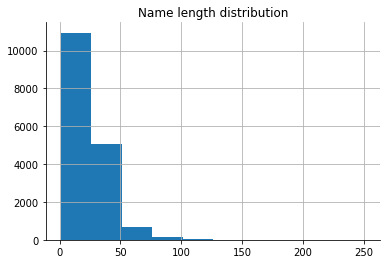

In [25]:
data['name_length'].hist()
plt.title("Name length distribution")
sns.despine()
plt.show()

In [30]:
data['Name'][3].split()

['Sudoku', '(Free)']

In [32]:
data['name_words_count'] = data['Name'].str.split().apply(len)

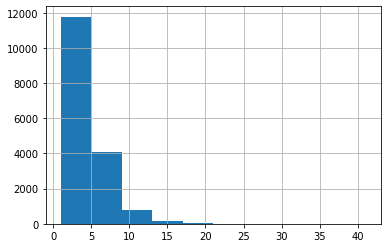

In [33]:
data['name_words_count'].hist()

In [40]:
data[data.name_words_count == data['name_words_count'].max()].Name.values

array(['Bubble Popping King Saga Free - Smash hit bubble trouble buster mania crush deluxe game struggle super memory match wrap blast break unblock pops up 2048 math skyline shotter heros juegos gratis bubble tea board puzzle bubble finder blitz twist spiele'],
      dtype=object)

## Subtitle

In [44]:
data['Subtitle'].isnull().sum()/data.shape[0]

0.6906274114085594

In [45]:
data['subtitle_is_null'] = data['Subtitle'].isnull()

In [46]:
data['subtitle_is_null'].value_counts()

True     11635
False     5212
Name: subtitle_is_null, dtype: int64

## Average User Rating

In [49]:
data['Average User Rating'].isnull().sum()/data.shape[0]

0.5555291743337093

In [52]:
data.dropna(subset=['Average User Rating'], inplace=True)

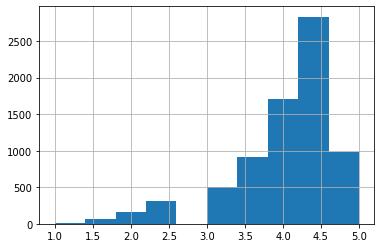

In [53]:
data['Average User Rating'].hist()

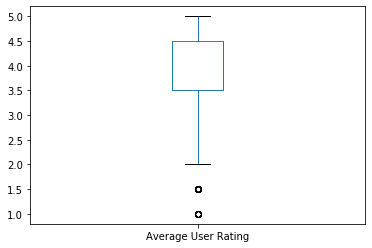

In [55]:
data['Average User Rating'].plot.box()
plt.show()

In [56]:
data = data[data['Average User Rating']>1.5]

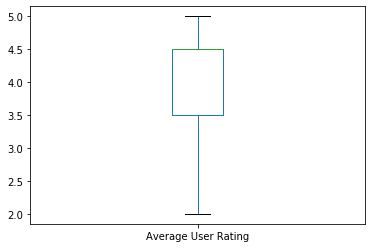

In [57]:
data['Average User Rating'].plot.box()
plt.show()

## User Rating Count	


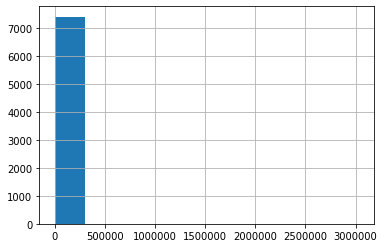

In [61]:
data['User Rating Count'].hist()

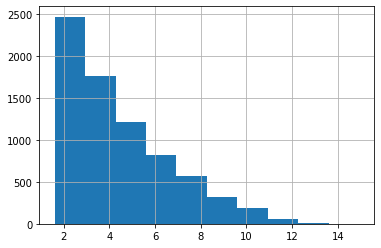

In [62]:
np.log(data['User Rating Count']).hist()

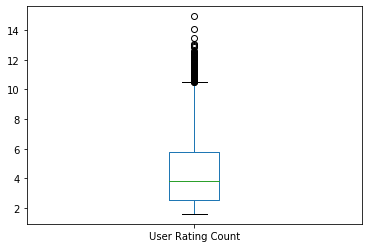

In [63]:
np.log(data['User Rating Count']).plot.box()

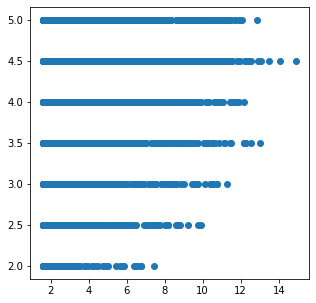

In [67]:
plt.figure(figsize=(5, 5))
plt.scatter(np.log(data['User Rating Count']), data['Average User Rating'])
plt.show()

In [68]:
data['User Rating Count'] = np.log(data['User Rating Count'])

## Price

In [71]:
data['Price']

0        2.99
1        1.99
2        0.00
3        0.00
4        2.99
         ... 
16950    0.00
16956    0.00
16962    0.00
16967    0.00
16993    0.00
Name: Price, Length: 7416, dtype: float64

In [72]:
data['Price'].isnull().sum()

0

In [73]:
data['free_to_play'] = data['Price'] == 0

In [74]:
data['free_to_play'].value_counts(normalize=True)

True     0.838727
False    0.161273
Name: free_to_play, dtype: float64

## In-app Purchases

In [76]:
data['In-app Purchases'].value_counts()

0.99                                                           386
1.99                                                           247
2.99                                                           198
0.99, 0.99                                                      74
4.99                                                            65
                                                              ... 
1.99, 4.99, 0.99, 9.99, 9.99, 4.99, 19.99, 9.99, 4.99, 9.99      1
1.99, 9.99, 0.99, 9.99, 2.99, 0.99, 19.99, 0.99, 0.99, 9.99      1
1.99, 0.99, 3.99, 9.99, 6.99                                     1
0.99, 2.99, 9.99, 4.99, 49.99, 29.99                             1
2.99, 2.99, 0.99, 2.99, 1.99, 9.99, 1.99, 1.99, 4.99             1
Name: In-app Purchases, Length: 2957, dtype: int64

In [83]:
data['In-app Purchases'].fillna('0.00', inplace=True)

In [84]:
data['In-app Purchases'].value_counts()

0.00                                                           2852
0.99                                                            386
1.99                                                            247
2.99                                                            198
0.99, 0.99                                                       74
                                                               ... 
1.99, 4.99, 0.99, 9.99, 9.99, 4.99, 19.99, 9.99, 4.99, 9.99       1
1.99, 9.99, 0.99, 9.99, 2.99, 0.99, 19.99, 0.99, 0.99, 9.99       1
1.99, 0.99, 3.99, 9.99, 6.99                                      1
0.99, 2.99, 9.99, 4.99, 49.99, 29.99                              1
2.99, 2.99, 0.99, 2.99, 1.99, 9.99, 1.99, 1.99, 4.99              1
Name: In-app Purchases, Length: 2958, dtype: int64

In [108]:
data['In-app Purchases'][data['In-app Purchases'].isin(['0', '0.0'])] = '0.00'

In [85]:
from sklearn.preprocessing import MultiLabelBinarizer

In [86]:
mlb = MultiLabelBinarizer()

In [130]:
inapps_encoded = mlb.fit_transform(data['In-app Purchases'].str.replace(',', '').str.split())
inapps_encoded.shape

(7416, 77)

In [131]:
inapps_classes = mlb.classes_

In [132]:
inapps_classes = [float(inapp) for inapp in inapps_classes]
inapps_classes = np.array(inapps_classes)//10

In [134]:
inapps_encoded_df = pd.DataFrame(inapps_encoded, columns=inapps_classes.astype(str), index=data.index)

In [149]:
inapps_encoded = []

for inapp in list(set(inapps_classes.astype(str))):
    try:
        inapps_encoded.append(inapps_encoded_df[inapp].apply(np.any, axis=1))
    except:
        inapps_encoded.append(inapps_encoded_df[inapp])

In [153]:
inapps_encoded = pd.concat(inapps_encoded, axis=1)

In [157]:
inapps_encoded = inapps_encoded.astype(bool)

In [159]:
inapps_encoded.columns = [f'inapps_{col}' for col in inapps_encoded.columns]

In [162]:
data = pd.concat([data, inapps_encoded], axis=1)

## Description

In [163]:
data['description_length'] = data['Description'].apply(len)
data['description_words_count'] = data['Description'].str.split().apply(len)

## Age Rating

In [166]:
data['Age Rating'].value_counts()

4+     4372
9+     1448
12+    1310
17+     286
Name: Age Rating, dtype: int64

In [171]:
data = pd.get_dummies(data, prefix='age_rating', columns=['Age Rating'])

## Languages

In [172]:
data['Languages']

0        DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
1                                                       EN
2                                                       EN
3        DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
4        DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...
                               ...                        
16950                                               EN, ZH
16956                                                   EN
16962                                                   EN
16967                                                   EN
16993                                                   EN
Name: Languages, Length: 7416, dtype: object

In [185]:
data['Languages'].fillna("EN", inplace=True)

In [186]:
data['lang_eng'] = data['Languages'].str.contains('EN')

In [189]:
data['supported_lang_count'] = data['Languages'].str.split().apply(len)

In [196]:
data['supported_lang_count'] = np.log(data['supported_lang_count'])

## Size

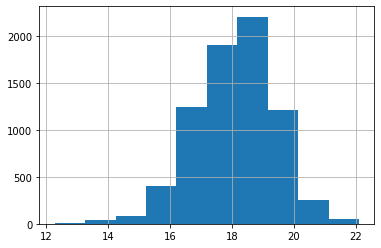

In [198]:
np.log(data['Size']).hist()

In [199]:
data['Size'] = np.log(data['Size'])

## Primary Genre

In [203]:
data['Primary Genre'].value_counts(normalize=True)

Games                0.964806
Entertainment        0.012271
Education            0.006203
Utilities            0.005798
Sports               0.003101
Reference            0.002157
Finance              0.001079
Productivity         0.000809
Book                 0.000674
Stickers             0.000405
Social Networking    0.000405
Lifestyle            0.000405
Music                0.000405
Health & Fitness     0.000270
News                 0.000270
Business             0.000270
Navigation           0.000135
Food & Drink         0.000135
Travel               0.000135
Shopping             0.000135
Medical              0.000135
Name: Primary Genre, dtype: float64

In [204]:
data['primary_genre_is_games'] = data['Primary Genre']=='Games'

## Genres

In [205]:
data['Genres']

0                       Games, Strategy, Puzzle
1                        Games, Strategy, Board
2                        Games, Board, Strategy
3                       Games, Strategy, Puzzle
4             Games, Strategy, Board, Education
                          ...                  
16950    Games, Strategy, Entertainment, Puzzle
16956    Games, Entertainment, Action, Strategy
16962               Games, Simulation, Strategy
16967               Games, Simulation, Strategy
16993         Games, Strategy, Board, Utilities
Name: Genres, Length: 7416, dtype: object

In [212]:
genres_encoded = mlb.fit_transform(data['Genres'].str.replace(',', '').str.replace('&', ' ').str.split())
genres_encoded.shape

(7416, 48)

In [216]:
genres_encoded = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=data.index)

In [219]:
data= pd.concat([data, genres_encoded], axis=1)

In [220]:
data['genres_count'] = data['Genres'].str.replace(',', '').str.replace('&', ' ').str.split().apply(len)

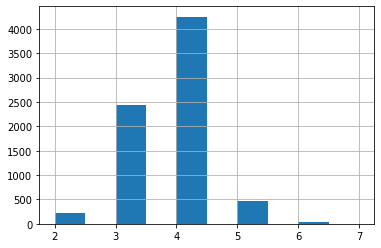

In [221]:
data['genres_count'].hist()

## Original Release Date
## Current Version Release Date

In [227]:
data['Original Release Date']

0        11/07/2008
1        11/07/2008
2        11/07/2008
3        23/07/2008
4        18/07/2008
            ...    
16950    31/07/2019
16956    23/07/2019
16962    31/07/2019
16967    28/07/2019
16993    30/07/2019
Name: Original Release Date, Length: 7416, dtype: object

In [236]:
data['Original Release Date'] = pd.to_datetime(
    data['Original Release Date'], 
    format='%d/%m/%y', 
    errors='ignore'
)

data['Original Release Date'] = pd.to_datetime(data['Original Release Date'])

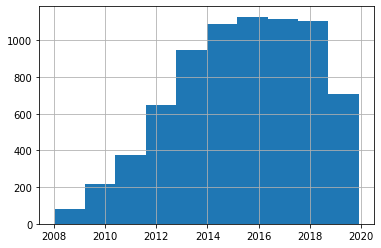

In [238]:
data['Original Release Date'].hist()

In [239]:
data['Current Version Release Date'] = pd.to_datetime(
    data['Current Version Release Date'], 
    format='%d/%m/%y', 
    errors='ignore'
)

data['Current Version Release Date'] = pd.to_datetime(data['Current Version Release Date'])

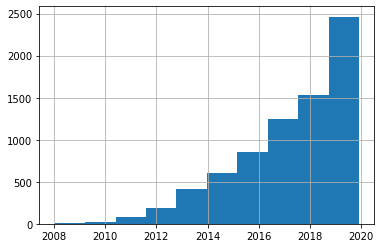

In [240]:
data['Current Version Release Date'].hist()

In [242]:
max(data['Original Release Date'])

Timestamp('2019-12-06 00:00:00')

In [243]:
max_date = max(data['Current Version Release Date'])

In [245]:
data['days_from_creation'] = (max_date - data['Original Release Date']).dt.days

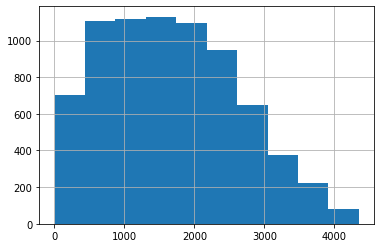

In [247]:
data['days_from_creation'].hist()

In [248]:
data['days_from_update'] = (max_date - data['Current Version Release Date']).dt.days

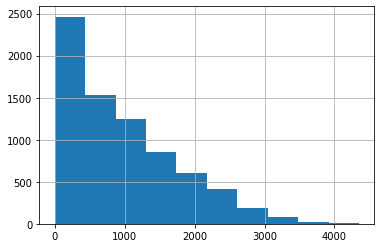

In [249]:
data['days_from_update'].hist()

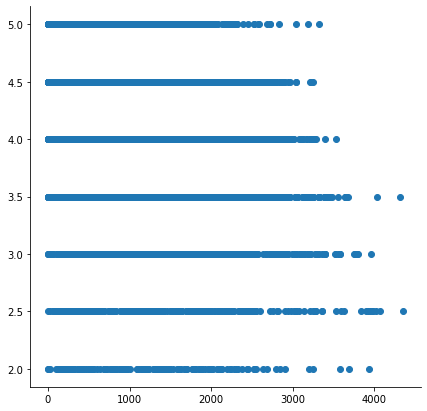

In [254]:
plt.figure(figsize=(7, 7))
plt.scatter(data['days_from_update'], data['Average User Rating'])
sns.despine()
plt.show()

In [259]:
data.drop(to_drop, axis=1).corr()

,Average User Rating,User Rating Count,Price,Size,name_length,name_words_count,subtitle_is_null,free_to_play,inapps_11.0,inapps_0,...,Strategy,Travel,Trivia,Utilities,Video,Weather,Word,genres_count,days_from_creation,days_from_update
Average User Rating,1.000000,0.176330,0.006474,0.165159,-0.043157,-0.039979,-0.183838,0.016899,-0.034312,0.040883,...,-0.006773,0.012863,-0.017441,-0.018477,0.011032,-0.017878,-0.003746,-0.022006,-0.248651,-0.251558
User Rating Count,0.176330,1.000000,0.036988,0.222288,-0.069621,-0.081034,-0.192376,-0.037366,-0.010056,0.167864,...,0.001058,-0.015088,-0.027493,-0.035199,-0.007716,-0.014015,-0.027027,0.094731,0.182645,-0.157188
Price,0.006474,0.036988,1.000000,0.115437,-0.048969,-0.060083,-0.001192,-0.531502,-0.002707,-0.057515,...,0.002707,-0.008664,-0.019520,-0.002072,-0.008564,0.045104,-0.012078,0.001048,0.064388,-0.058285
Size,0.165159,0.222288,0.115437,1.000000,-0.036871,-0.062917,-0.299253,-0.059979,0.006836,0.188714,...,-0.000109,0.001929,-0.046672,-0.074686,-0.001683,-0.004377,-0.035772,-0.019517,-0.446772,-0.454136
name_length,-0.043157,-0.069621,-0.048969,-0.036871,1.000000,0.922857,0.130737,0.097440,0.005074,-0.022720,...,0.005832,0.080109,0.017806,-0.005501,0.018520,-0.012064,-0.016634,0.086110,-0.001624,0.179939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weather,-0.017878,-0.014015,0.045104,-0.004377,-0.012064,-0.013174,-0.015411,-0.026483,-0.000135,-0.003442,...,0.000135,-0.000822,-0.001190,-0.001205,-0.000427,1.000000,-0.000917,0.005527,-0.014930,-0.007907
Word,-0.003746,-0.027027,-0.012078,-0.035772,-0.016634,-0.014462,-0.008359,0.011294,-0.000917,-0.010813,...,0.000917,0.018781,-0.008092,-0.008198,0.043899,-0.000917,1.000000,0.011460,0.003564,0.000304
genres_count,-0.022006,0.094731,0.001048,-0.019517,0.086110,0.079637,-0.044370,0.009490,0.005527,0.074793,...,0.012147,0.036612,0.022428,0.051381,0.062226,0.005527,0.011460,1.000000,0.113729,0.025432
days_from_creation,-0.248651,0.182645,0.064388,-0.446772,-0.001624,0.004438,0.436682,-0.199898,-0.003879,-0.091695,...,0.016288,-0.002321,-0.005622,-0.001325,-0.016627,-0.014930,0.003564,0.113729,1.000000,0.557091


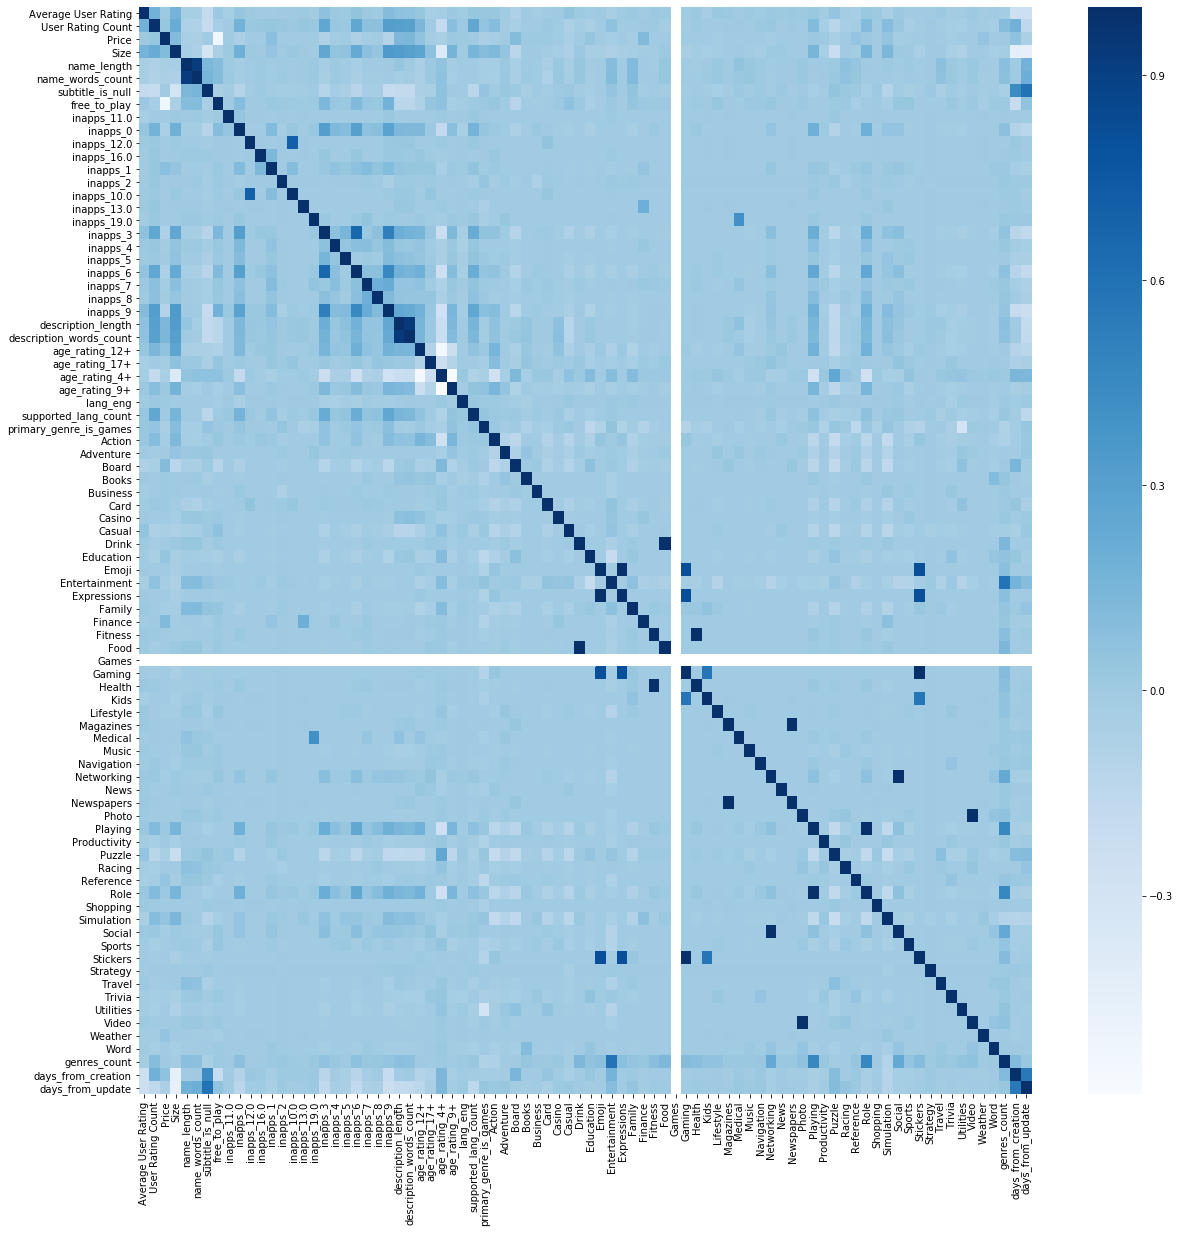

In [262]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(to_drop, axis=1).corr(), cmap='Blues')
plt.show()

# ML

In [264]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics  # подгружаем метрики

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def dataframe_metrics(y_test,y_pred):
    stats = [
       metrics.mean_absolute_error(y_test, y_pred),
       np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
       metrics.r2_score(y_test, y_pred),
       mean_absolute_percentage_error(y_test, y_pred)
    ]
    return stats


measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2", "MAPE"]})
measured_metrics.set_index("error_type")

""
error_type
MAE
RMSE
R2
MAPE


In [278]:
data_clean = data.drop(to_drop, axis=1)

In [285]:
X_train, X_test, y_train, y_test = train_test_split(
    data_clean.drop(['Average User Rating'], axis=1), 
    data_clean['Average User Rating'], 
    test_size=0.3
)

## Baseline

In [266]:
y_median = np.median(y_train)                   
y_pred_naive = np.ones(len(y_test)) * y_median  
y_pred_naive[:5]

array([4.5, 4.5, 4.5, 4.5, 4.5])

In [268]:
measured_metrics['naive_baseline'] = dataframe_metrics(y_test, y_pred_naive)

In [270]:
measured_metrics

,error_type,naive_baseline
0,MAE,0.539101
1,RMSE,0.802454
2,R2,-0.324253
3,MAPE,16.775441


## Linear models

In [289]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[X_train.columns] = scaler.fit_transform(X_train)
X_test_scaled[X_train.columns] = scaler.transform(X_test)

In [290]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [291]:
measured_metrics['lr'] = dataframe_metrics(y_test, lr.predict(X_test_scaled))

In [301]:
np.set_printoptions(precision=3)

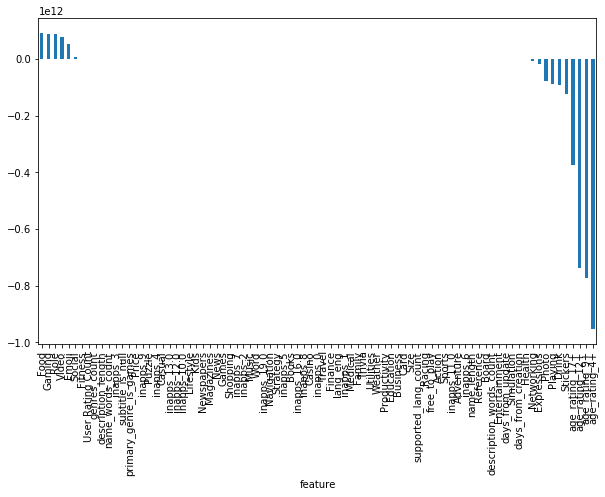

In [299]:
featureImportance = pd.DataFrame({"feature": X_train.columns, 
                                  "importance": lr.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

In [304]:
lasso_cv = LassoCV()
lasso_cv.fit(X_train_scaled, y_train)
measured_metrics['lasso_cv'] = dataframe_metrics(y_test, lasso_cv.predict(X_test_scaled))
measured_metrics

,error_type,naive_baseline,lr,lasso_cv
0,MAE,0.539101,7.721481e+08,0.501208
1,RMSE,0.802454,3.642215e+10,0.652164
2,R2,-0.324253,-2.746799e+21,0.119337
3,MAPE,16.775441,3.088592e+10,14.060883


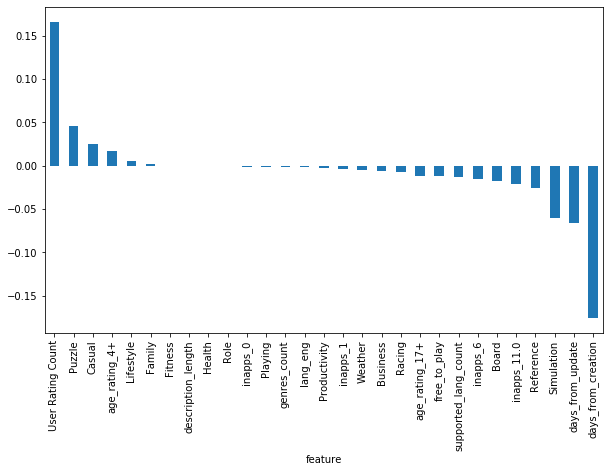

In [305]:
featureImportance = pd.DataFrame({"feature": X_train.columns[lasso_cv.coef_!=0], 
                                  "importance": lasso_cv.coef_[lasso_cv.coef_!=0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

In [306]:
ridge_cv = RidgeCV()
ridge_cv.fit(X_train_scaled, y_train)
measured_metrics['ridge_cv'] = dataframe_metrics(y_test, ridge_cv.predict(X_test_scaled))
measured_metrics

,error_type,naive_baseline,lr,lasso_cv,ridge_cv
0,MAE,0.539101,7.721481e+08,0.501208,0.502455
1,RMSE,0.802454,3.642215e+10,0.652164,0.655147
2,R2,-0.324253,-2.746799e+21,0.119337,0.111262
3,MAPE,16.775441,3.088592e+10,14.060883,14.078513


In [308]:
# featureImportance = pd.DataFrame({"feature": X_train.columns[ridge_cv.coef_!=0], 
#                                   "importance": ridge_cv.coef_[ridge_cv.coef_!=0]})

# featureImportance.set_index('feature', inplace=True)
# featureImportance.sort_values(["importance"], ascending=False, inplace=True)
# featureImportance["importance"].plot('bar', figsize=(10, 6));

In [309]:
elastic_cv = ElasticNetCV()
elastic_cv.fit(X_train_scaled, y_train)
measured_metrics['elastic_cv'] = dataframe_metrics(y_test, elastic_cv.predict(X_test_scaled))
measured_metrics

,error_type,naive_baseline,lr,lasso_cv,ridge_cv,elastic_cv
0,MAE,0.539101,7.721481e+08,0.501208,0.502455,0.501125
1,RMSE,0.802454,3.642215e+10,0.652164,0.655147,0.652088
2,R2,-0.324253,-2.746799e+21,0.119337,0.111262,0.119542
3,MAPE,16.775441,3.088592e+10,14.060883,14.078513,14.060557


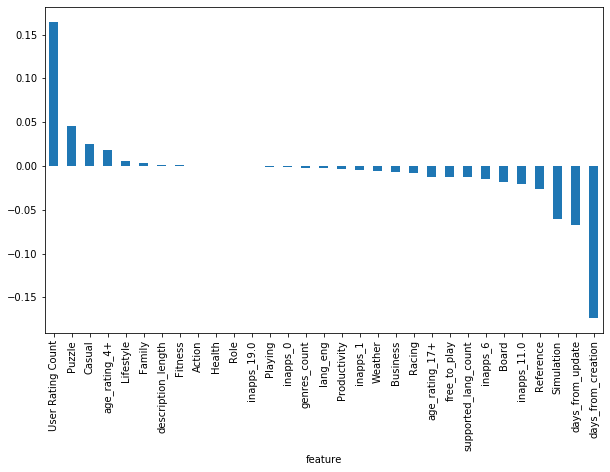

In [310]:
featureImportance = pd.DataFrame({"feature": X_train.columns[elastic_cv.coef_!=0], 
                                  "importance": elastic_cv.coef_[elastic_cv.coef_!=0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6))

In [311]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
measured_metrics['rf'] = dataframe_metrics(y_test, rf.predict(X_test))
measured_metrics

,error_type,naive_baseline,lr,lasso_cv,ridge_cv,elastic_cv,rf
0,MAE,0.539101,7.721481e+08,0.501208,0.502455,0.501125,0.493191
1,RMSE,0.802454,3.642215e+10,0.652164,0.655147,0.652088,0.658057
2,R2,-0.324253,-2.746799e+21,0.119337,0.111262,0.119542,0.103350
3,MAPE,16.775441,3.088592e+10,14.060883,14.078513,14.060557,13.667421


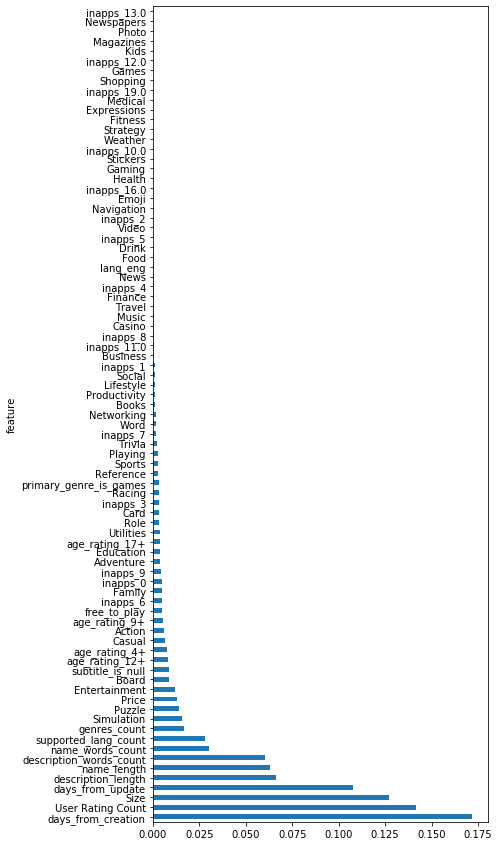

In [314]:
featureImportance = pd.DataFrame({"feature": X_train.columns, 
                                  "importance": rf.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('barh', figsize=(6, 15));

## GridSearchCV()

In [315]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RandomForestRegressor()

In [319]:
X_train.shape[1]//2

41

In [321]:
params = {
    'n_estimators':[10, 50, 100],
    'max_depth':[1, 2, 5, 7, 10],
    'max_features':[
        'auto', 
        X_train.shape[1]//2, 
        'sqrt',
        'log2'
    ]
}

rscv = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions = params,
    n_jobs=-1,
    verbose=1
)

In [322]:
rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.7s finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st

In [323]:
rscv.best_params_

{'n_estimators': 10, 'max_features': 'auto', 'max_depth': 7}

In [330]:
rscv.best_score_

0.17101017495314305

In [328]:
rscv.best_estimator_.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [329]:
measured_metrics['rf_cv'] = dataframe_metrics(y_test, rscv.best_estimator_.predict(X_test))
measured_metrics

,error_type,naive_baseline,lr,lasso_cv,ridge_cv,elastic_cv,rf,rf_cv
0,MAE,0.539101,7.721481e+08,0.501208,0.502455,0.501125,0.493191,0.478412
1,RMSE,0.802454,3.642215e+10,0.652164,0.655147,0.652088,0.658057,0.632623
2,R2,-0.324253,-2.746799e+21,0.119337,0.111262,0.119542,0.103350,0.171321
3,MAPE,16.775441,3.088592e+10,14.060883,14.078513,14.060557,13.667421,13.411456


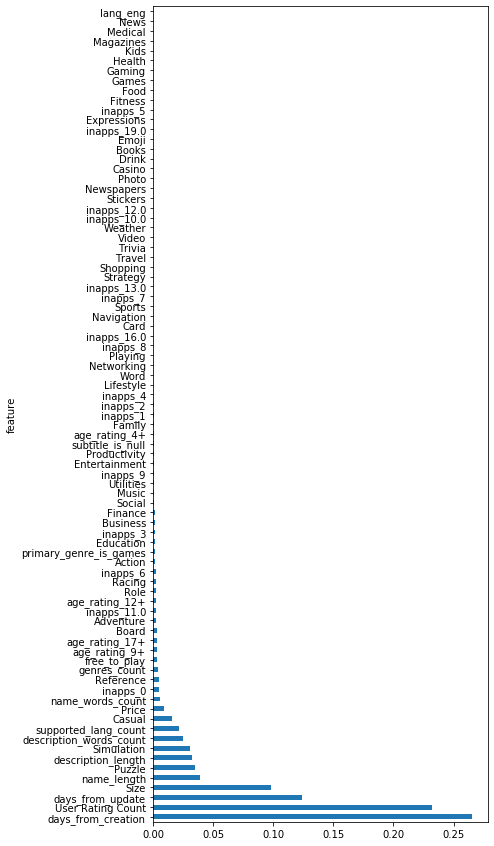

In [331]:
featureImportance = pd.DataFrame({"feature": X_train.columns, 
                                  "importance": rscv.best_estimator_.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('barh', figsize=(6, 15));